# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")

In [3]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
CCTV_Seoul.columns[0]

'기관명'

In [6]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True)

In [7]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [8]:
pop_Seoul = pd.read_excel("../data/01. Seoul_Population.xls", header=2, usecols="B, D, G, J, N")

In [9]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [10]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: '구별',
        pop_Seoul.columns[1]: '인구수',
        pop_Seoul.columns[2]: '한국인',
        pop_Seoul.columns[3]: '외국인',
        pop_Seoul.columns[4]: '고령자'
    },
    inplace=True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

## Pandas 기초
- Python에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서 최대 효율
- 코딩이 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가 스테로이드를 맞은 엑셀로 표현함


#### Series
- index와 value로 이루어져 있다.
- 한 가지 데이터 타입만 가질 수 있다.

In [11]:
import pandas as pd
import numpy as np

In [12]:
pd.Series([1, 2, 3, 4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [13]:
pd.Series(np.array([1, 2, 3]))

0    1
1    2
2    3
dtype: int32

In [14]:
pd.Series({'Key': 'Value'})

Key    Value
dtype: object

In [15]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [16]:
pd.Series([1, 2, 3, 4, '5'])

0    1
1    2
2    3
3    4
4    5
dtype: object

In [17]:
data = pd.Series([1, 2, 3, 4, 5, 6, 7])

In [18]:
data % 2

0    1
1    0
2    1
3    0
4    1
5    0
6    1
dtype: int64

#### 날짜 데이터

In [19]:
dates = pd.date_range('20210101', periods=6)

### DataFrame
- pd.Series()
    - index, value
- pd.DataFrame()
    - index, value, columns

In [20]:
# 표준 정규분포에서 샘플링한 난수 생성
data = np.random.randn(6, 4)

In [21]:
df = pd.DataFrame(data, index=dates, columns=['A', 'B', 'C', 'D'])

### 데이터 프레임 정보 탐색
- df.head()

In [22]:
df.head(2)

,A,B,C,D
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457


- df.tail

In [23]:
df.tail(2)

,A,B,C,D
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672


- df.index

In [24]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
df.values

array([[ 0.43455673, -0.55982345,  0.62695236, -1.65155115],
       [-1.0889753 , -0.01099036, -1.09073521,  0.24345701],
       [ 1.33186272, -1.64705592, -0.61107795, -0.81024165],
       [ 0.09607784, -0.26626335,  1.08298452,  0.14931617],
       [-0.63223478, -1.36381741,  1.19986932, -0.48991743],
       [-0.63930693, -0.50634933, -0.84562485, -0.9636716 ]])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe(): 데이터 프레임의 기술통계 정보 확인

In [28]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.083003,-0.725717,0.060395,-0.587101
std,0.885990,0.640876,1.025858,0.716412
min,-1.088975,-1.647056,-1.090735,-1.651551
25%,-0.637539,-1.162819,-0.786988,-0.925314
50%,-0.268078,-0.533086,0.007937,-0.650080
75%,0.349937,-0.326285,0.968976,-0.010492
max,1.331863,-0.010990,1.199869,0.243457


### 데이터 정렬
- sort_values() 
- 특정 컬럼(열)을 기준으로 데이터를 정렬한다. by=' '
- 내림차순으로 정렬하고 싶으면 ascending-False

In [29]:
df

,A,B,C,D
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672


In [30]:
df.sort_values(by='B', ascending=False, inplace=True)

In [31]:
df

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


### 데이터 선택

In [32]:
df

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


In [33]:
# 한 개 컬럼 선택
df['A']

2021-01-02   -1.088975
2021-01-04    0.096078
2021-01-06   -0.639307
2021-01-01    0.434557
2021-01-05   -0.632235
2021-01-03    1.331863
Name: A, dtype: float64

In [34]:
type(df['A'])

pandas.core.series.Series

In [35]:
#알파벳인 경우에는 리스트 안에 '' 안 넣어도 .으로 가능, 숫자인 경우에는 안됌
df.A

2021-01-02   -1.088975
2021-01-04    0.096078
2021-01-06   -0.639307
2021-01-01    0.434557
2021-01-05   -0.632235
2021-01-03    1.331863
Name: A, dtype: float64

In [36]:
# 두개 이상 컬럼 선택할때는 리스트 안에 담는다
df[['A', 'B']]

,A,B
2021-01-02,-1.088975,-0.010990
2021-01-04,0.096078,-0.266263
2021-01-06,-0.639307,-0.506349
2021-01-01,0.434557,-0.559823
2021-01-05,-0.632235,-1.363817
2021-01-03,1.331863,-1.647056


### offset index
- [n:m]: n부터 m-1 까지
- 인덱스나 컬럼의 이름으로 slice하는 경우에는 끝을 포함한다.

In [37]:
df

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


In [38]:
df[0:3]

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672


In [39]:
df['20210101':'20210104']

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


- loc: location
- index 이름으로 특정 행, 열을 선택한다. 인덱스와 컬럼 모두 포함해야함

In [40]:
#인덱스는 전부 다 가져오고 컬럼은 A, C만 가져와라
df.loc[:, ['A', 'C']]

,A,C
2021-01-02,-1.088975,-1.090735
2021-01-04,0.096078,1.082985
2021-01-06,-0.639307,-0.845625
2021-01-01,0.434557,0.626952
2021-01-05,-0.632235,1.199869
2021-01-03,1.331863,-0.611078


In [41]:
#인덱스는 전부 다 가져오고 컬럼은 A부터 C까지 가져와라
df.loc[:, 'A':'C']

,A,B,C
2021-01-02,-1.088975,-0.010990,-1.090735
2021-01-04,0.096078,-0.266263,1.082985
2021-01-06,-0.639307,-0.506349,-0.845625
2021-01-01,0.434557,-0.559823,0.626952
2021-01-05,-0.632235,-1.363817,1.199869
2021-01-03,1.331863,-1.647056,-0.611078


In [42]:
df.loc['20210102': '20210104', ['A', 'D']]

,A,D
2021-01-02,-1.088975,0.243457
2021-01-04,0.096078,0.149316
2021-01-03,1.331863,-0.810242


In [43]:
df.loc['20210102': '20210104', 'A':'D']

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


In [44]:
df.loc['20210101', ['A', 'B']]

A    0.434557
B   -0.559823
Name: 2021-01-01 00:00:00, dtype: float64

- iloc: inter location
    - 컴퓨터가 인식하는 인덱스 값

In [45]:
df

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


In [46]:
df.iloc[3]

A    0.434557
B   -0.559823
C    0.626952
D   -1.651551
Name: 2021-01-01 00:00:00, dtype: float64

In [47]:
# 앞에가 행을 나타내고 뒤가 열을 나타냄
df.iloc[3, 2]

0.6269523582115963

In [48]:
df.iloc[3:5, 0:2]

,A,B
2021-01-01,0.434557,-0.559823
2021-01-05,-0.632235,-1.363817


In [49]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2021-01-04,0.096078,1.082985
2021-01-06,-0.639307,-0.845625
2021-01-05,-0.632235,1.199869


In [50]:
df.iloc[:, 1:3]

,B,C
2021-01-02,-0.010990,-1.090735
2021-01-04,-0.266263,1.082985
2021-01-06,-0.506349,-0.845625
2021-01-01,-0.559823,0.626952
2021-01-05,-1.363817,1.199869
2021-01-03,-1.647056,-0.611078


### Condition

In [51]:
df

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


In [52]:
# A 컬럼에서 0보다 큰 숫자(양수)만 선택

df['A'] > 0

2021-01-02    False
2021-01-04     True
2021-01-06    False
2021-01-01     True
2021-01-05    False
2021-01-03     True
Name: A, dtype: bool

In [53]:
#전체 부분에서 A 컬럼이 0보다 큰걸 기준으로 보여줘라.: 전체 데이터에 마스킹을 해준다고 표현
df[df['A'] > 0]

,A,B,C,D
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


In [54]:
df[df > 0]

,A,B,C,D
2021-01-02,NaN,NaN,NaN,0.243457
2021-01-04,0.096078,NaN,1.082985,0.149316
2021-01-06,NaN,NaN,NaN,NaN
2021-01-01,0.434557,NaN,0.626952,NaN
2021-01-05,NaN,NaN,1.199869,NaN
2021-01-03,1.331863,NaN,NaN,NaN


- NaN: Not a Number

### 컬럼 추가
- 기존 컬럼이 없으면 추가를 하고 기존 컬럼이 있으면 수정을 한다.

In [55]:
df

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


In [56]:
df['E'] = ['one', 'two', 'three', 'four', 'five' ,'six']
df

,A,B,C,D,E
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457,one
2021-01-04,0.096078,-0.266263,1.082985,0.149316,two
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672,three
2021-01-01,0.434557,-0.559823,0.626952,-1.651551,four
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917,five
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242,six


- isin(): 특정 요소가 있는지 확인

In [57]:
df['E'].isin(['two'])

2021-01-02    False
2021-01-04     True
2021-01-06    False
2021-01-01    False
2021-01-05    False
2021-01-03    False
Name: E, dtype: bool

In [58]:
df['E'].isin(['two', 'five'])

2021-01-02    False
2021-01-04     True
2021-01-06    False
2021-01-01    False
2021-01-05     True
2021-01-03    False
Name: E, dtype: bool

In [59]:
df['E'].isin(['two', 'five', 'three'])

2021-01-02    False
2021-01-04     True
2021-01-06     True
2021-01-01    False
2021-01-05     True
2021-01-03    False
Name: E, dtype: bool

In [60]:
df[df['E'].isin(['two', 'five', 'three'])]

,A,B,C,D,E
2021-01-04,0.096078,-0.266263,1.082985,0.149316,two
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672,three
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917,five


### 특정 컬럼 제거
- del
- drop

In [61]:
del df['E']
df

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


In [62]:
df.drop(['D'], axis=1) #axis=0 가로 이때는 인덱스값 / axis=1 세로 이때는 컬럼 값

,A,B,C
2021-01-02,-1.088975,-0.010990,-1.090735
2021-01-04,0.096078,-0.266263,1.082985
2021-01-06,-0.639307,-0.506349,-0.845625
2021-01-01,0.434557,-0.559823,0.626952
2021-01-05,-0.632235,-1.363817,1.199869
2021-01-03,1.331863,-1.647056,-0.611078


In [63]:
df.drop(['20210105']) #컬럼과 다르게 axis=0을 안써줘도 지워짐..

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


### apply()

In [64]:
df

,A,B,C,D
2021-01-02,-1.088975,-0.010990,-1.090735,0.243457
2021-01-04,0.096078,-0.266263,1.082985,0.149316
2021-01-06,-0.639307,-0.506349,-0.845625,-0.963672
2021-01-01,0.434557,-0.559823,0.626952,-1.651551
2021-01-05,-0.632235,-1.363817,1.199869,-0.489917
2021-01-03,1.331863,-1.647056,-0.611078,-0.810242


In [65]:
df['A'].apply('sum')

-0.4980197266866848

In [66]:
df['A'].apply('mean')

-0.08300328778111414

In [67]:
df['A'].apply('min'), df['A'].apply('max')

(-1.0889753038824457, 1.331862715172443)

In [68]:
df[['A', 'D']].apply('sum')

A   -0.498020
D   -3.522609
dtype: float64

In [69]:
df['A'].apply(np.sum)

2021-01-02   -1.088975
2021-01-04    0.096078
2021-01-06   -0.639307
2021-01-01    0.434557
2021-01-05   -0.632235
2021-01-03    1.331863
Name: A, dtype: float64

In [70]:
df['A'].apply(np.mean)

2021-01-02   -1.088975
2021-01-04    0.096078
2021-01-06   -0.639307
2021-01-01    0.434557
2021-01-05   -0.632235
2021-01-03    1.331863
Name: A, dtype: float64

In [71]:
df['A'].apply(np.std)

2021-01-02    0.0
2021-01-04    0.0
2021-01-06    0.0
2021-01-01    0.0
2021-01-05    0.0
2021-01-03    0.0
Name: A, dtype: float64

In [72]:
df.apply(np.sum)

A   -0.498020
B   -4.354300
C    0.362368
D   -3.522609
dtype: float64

In [73]:
def plusminus(num):
    return 'plus' if num > 0 else 'minus'

In [74]:
df['A'].apply(plusminus)

2021-01-02    minus
2021-01-04     plus
2021-01-06    minus
2021-01-01     plus
2021-01-05    minus
2021-01-03     plus
Name: A, dtype: object

In [75]:
df['A'].apply(lambda num: 'plus' if num > 0 else 'minus')

2021-01-02    minus
2021-01-04     plus
2021-01-06    minus
2021-01-01     plus
2021-01-05    minus
2021-01-03     plus
Name: A, dtype: object

---

## 2. CCTV 데이터 훑어보기

In [76]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [77]:
CCTV_Seoul.sort_values(by='소계').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [78]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [79]:
CCTV_Seoul['최근증가율'] = ((CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2016년']) / CCTV_Seoul['2013년도 이전'] * 100)

In [80]:
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


---

## 3. 인구현황 데이터 훑어보기

In [81]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [82]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [83]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [84]:
len(pop_Seoul['구별'].unique())

25

In [85]:
pop_Seoul['외국인비율'] = (pop_Seoul['외국인'] / pop_Seoul['인구수']) * 100
pop_Seoul['고령자비율'] = (pop_Seoul['고령자'] / pop_Seoul['인구수']) * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [86]:
pop_Seoul.sort_values(by=['외국인'], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [87]:
pop_Seoul.sort_values(by=['고령자'], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [88]:
pop_Seoul.sort_values(by=['고령자비율'], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


---

## 4. 두 데이터 합치기

#### Pandas에서 데이터 프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join

In [89]:
#딕셔너리 안의 리스트 형태: 컬럼 기준 열 값으로 데이터가 들어감
left = pd.DataFrame({'key': ['k0', 'k4', 'k2', 'k3'], 
                     'A': ['A0', 'A1', 'A2', 'A3'], 
                     'B': ['B0', 'B1', 'B2', 'B3']})
left

,key,A,B
0,k0,A0,B0
1,k4,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [90]:
#리스트 안의 딕셔너리 형태: 행 값으로 데이터가 들어감
right = pd.DataFrame([
    {'key':'k0', 'C':'C0', 'D':'D0'},
    {'key':'k1', 'C':'C1', 'D':'D1'},
    {'key':'k2', 'C':'C2', 'D':'D2'},
    {'key':'k3', 'C':'C3', 'D':'D3'}
])
right

,key,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,k3,C3,D3


#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 한다
- 기준이 되는 키값은 두 데이터 프레임에 모두 포함되어 있어야 한다

In [91]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k2,A2,B2,C2,D2
2,k3,A3,B3,C3,D3


In [92]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k4,A1,B1,NaN,NaN
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [93]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,NaN,NaN,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [94]:
#교집합 디폴트값으로 how 설정안하면 inner로 나옴
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k2,A2,B2,C2,D2
2,k3,A3,B3,C3,D3


In [95]:
#합집합
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k4,A1,B1,NaN,NaN
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3
4,k1,NaN,NaN,C1,D1


In [96]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [97]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [98]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제
- del
- drop

In [99]:
del data_result['2013년도 이전']

In [100]:
data_result.head()

,구별,소계,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [101]:
del data_result['2014년']
data_result.head()

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [102]:
data_result.drop(['2015년', '2016년'], axis=1, inplace=True)

In [103]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [104]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- correlation의 약자
- 상관계수가 0.2 이상인 데이터 비교

In [105]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [106]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [107]:
data_result['CCTV비율'] = (data_result['소계'] / data_result['인구수']) * 100

In [108]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [109]:
data_result.sort_values(by='CCTV비율', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [110]:
data_result.sort_values(by='CCTV비율', ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


---

# matplotlib 기초

In [111]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
get_ipython().run_line_magic('matplotlib', 'inline')

matplotlib 그래프 기본 형태

    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.show()

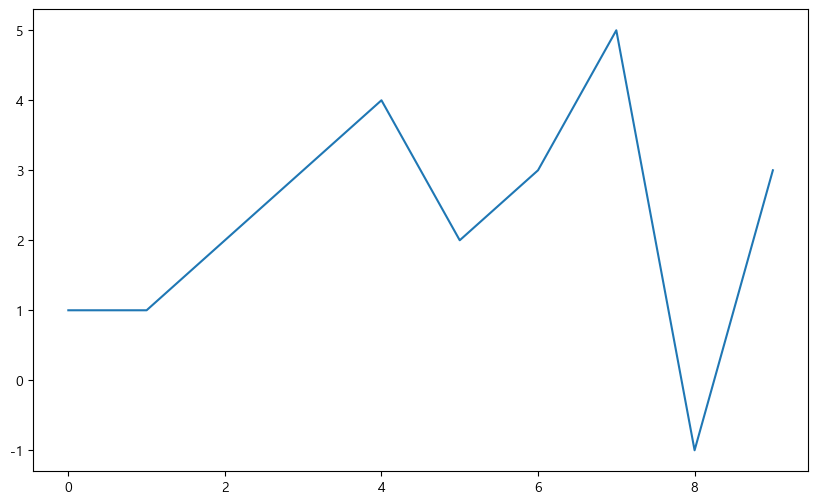

In [112]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3])
plt.show()

### 예제1: 그래프 기초

#### 삼각함수 그리기
- np.arange(a, b, s): a부터 b까지 s의 간격
- np.sin(value)    

In [113]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

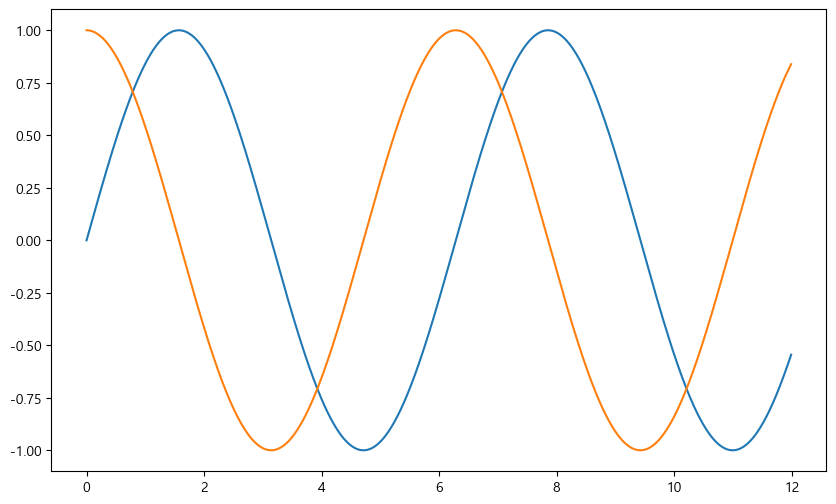

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주황색, 파란색 선 데이터 의미 구분

In [115]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t))
    plt.plot(t, np.cos(t))
    plt.grid(True)
    plt.legend(labels=['sin', 'cos'], loc= 3) #3='lower left' shift tab을 해서 예시 보면 됌
    plt.title('Example of sinewave')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()  

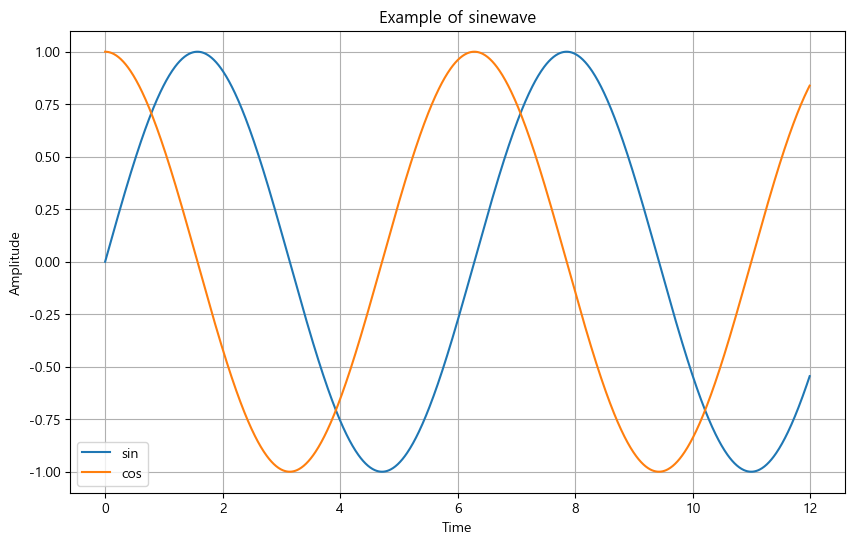

In [116]:
drawGraph()

### 예제2: 그래프 커스텀

In [117]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

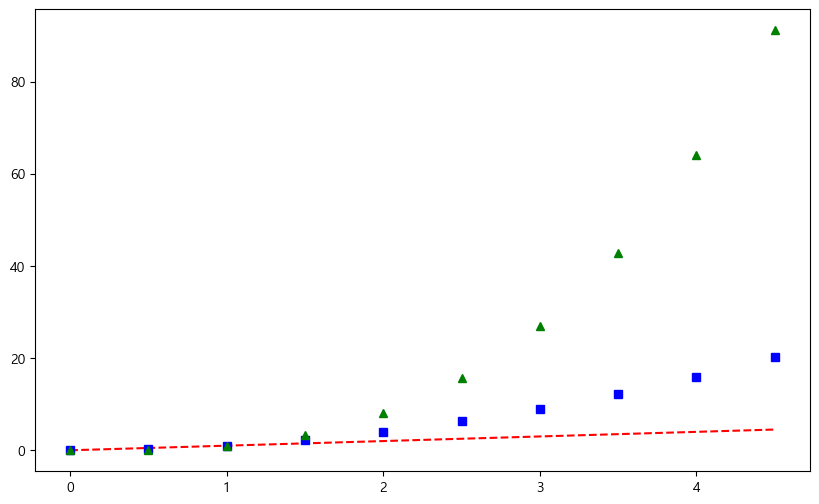

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(t, t, 'r--') # red --
plt.plot(t, t** 2, 'bs') # blue squre
plt.plot(t, t** 3, 'g^') # green ^ 위로 솟은 화살표 <, > 도 있음
plt.show()

In [119]:
#t = [0, 1, 2, 3, 4, 5, 6]
t = list(range(0, 7))
y = [1, 4, 5, 8, 9, 5, 3]

In [120]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(t, 
             y, 
             color='green',
             linestyle='--', # -- 혹은 dashed, 실선은 -
             marker='o',
             markerfacecolor='blue',
             markersize=15)
    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()

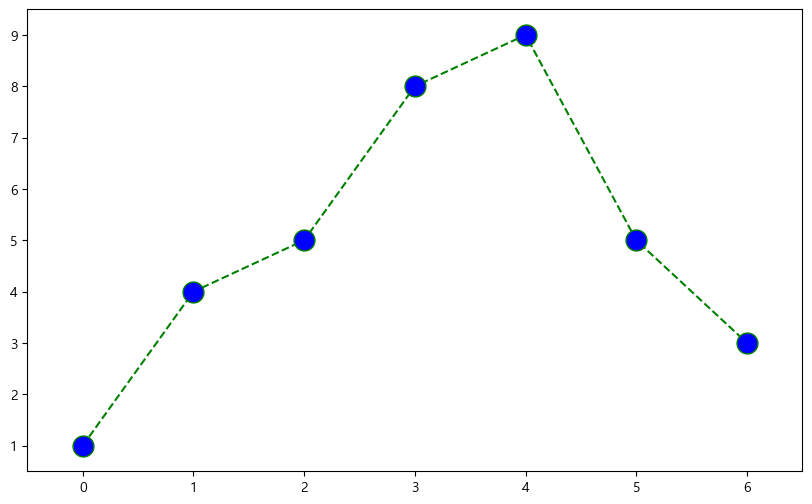

In [121]:
drawGraph()

### 예제3: scatter plot

In [122]:
t = np.array(range(0, 10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])             

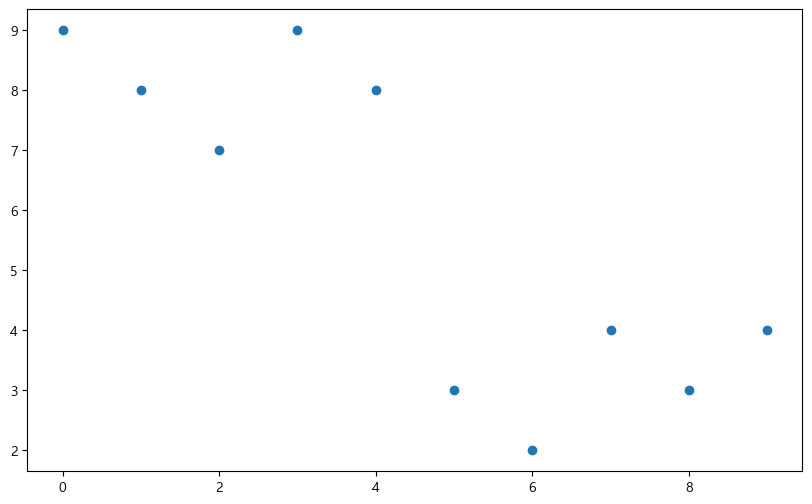

In [123]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y)
    plt.show()

drawGraph()

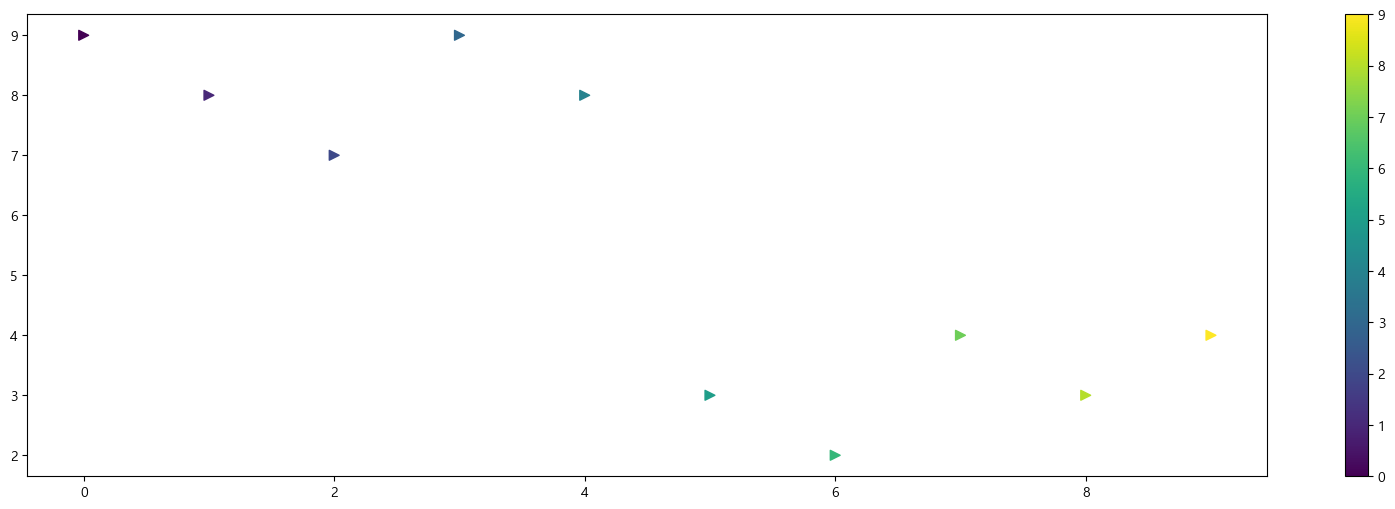

In [124]:
colormap = t
def drawGraph():
    plt.figure(figsize=(20, 6))
    plt.scatter(t, y, s = 50, c=colormap, marker='>')
    plt.colorbar()
    plt.show()

drawGraph()

### 예제 4: Pandas에서 plot 그리기
- matplotlib을 가져와서 사용한다

In [125]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:xlabel='구별'>

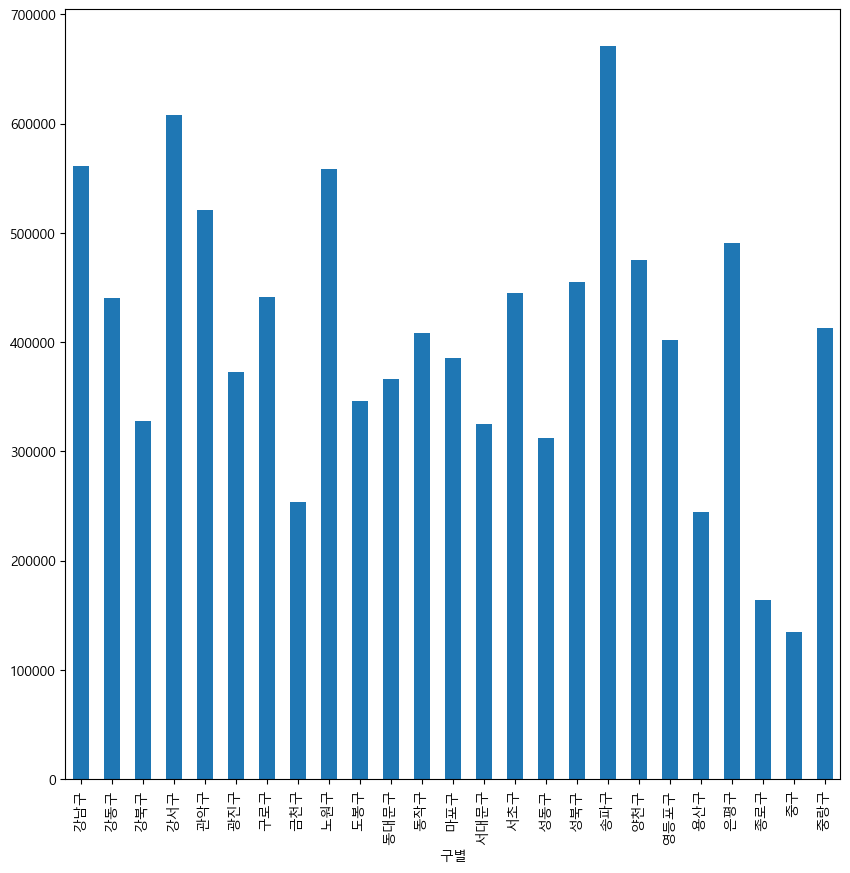

In [126]:
data_result['인구수'].plot(kind='bar', figsize=(10, 10))

<AxesSubplot:ylabel='구별'>

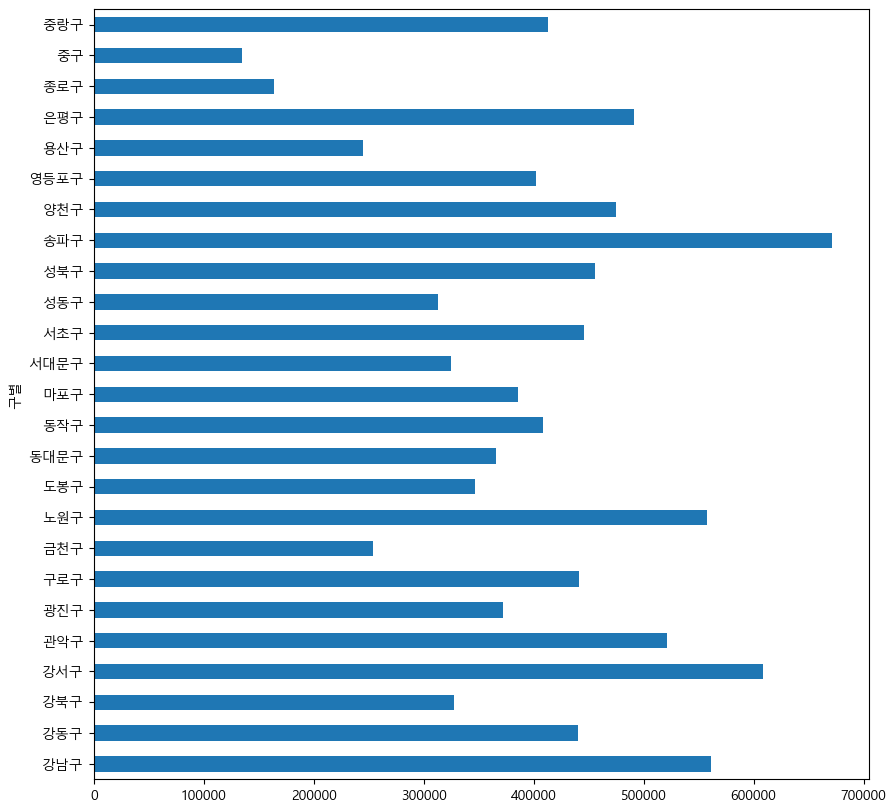

In [127]:
data_result['인구수'].plot(kind='barh', figsize=(10, 10))

### 5. 데이터 시각화

In [128]:
data_result['인구수'].plot

In [129]:
import matplotlib.pyplot as plt
# import matplotlib as mpl
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [130]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

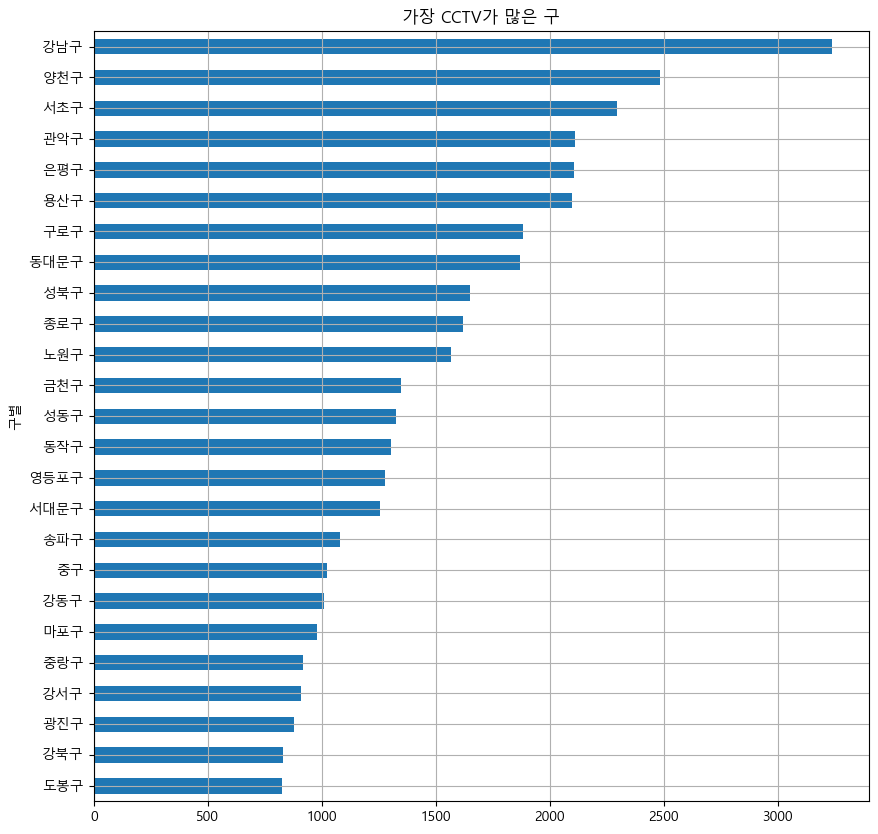

In [131]:
def drawGraph():
    data_result['소계'].sort_values().plot(
        kind='barh', grid=True, title='가장 CCTV가 많은 구', figsize=(10, 10)); #세미클론을 주면 표 앞에 글자가 사라짐

drawGraph()    

In [132]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


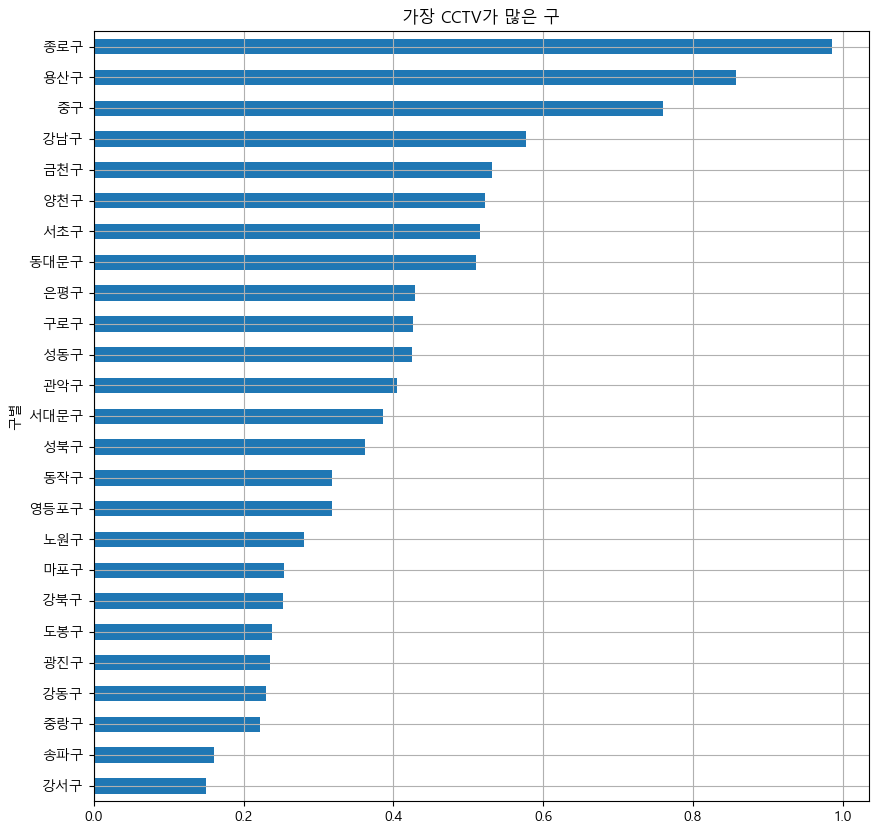

In [133]:
def drawGraph():
    data_result['CCTV비율'].sort_values().plot(
        kind='barh', grid=True, title='가장 CCTV가 많은 구', figsize=(10, 10)); #세미클론을 주면 표 앞에 글자가 사라짐

drawGraph()  

### 6. 데이터의 경향 표시

In [134]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter ploit 그리기

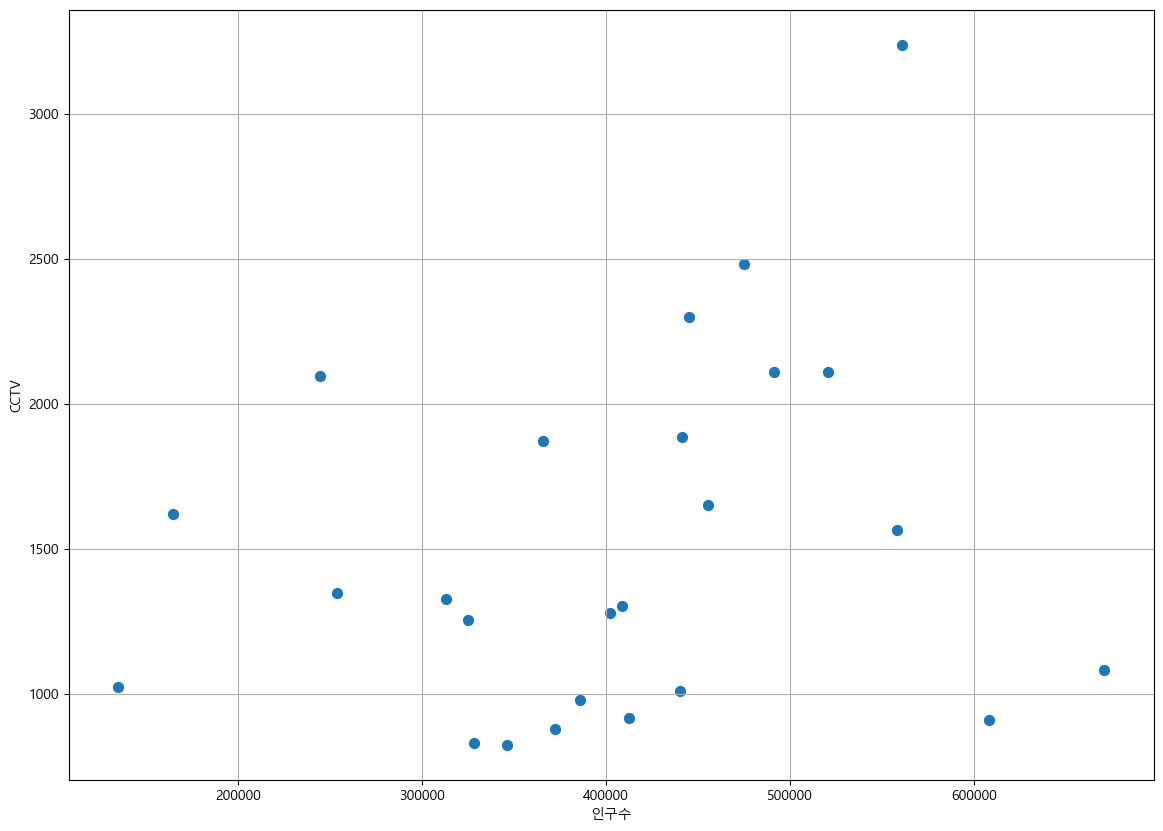

In [135]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid(True)
    plt.show()
    
drawGraph()

#### Numpy를 이용한 1차 직선 만들기
- np.polyfit(): 직선을 구성하기 위한 계수를 계산 -기울기와 y절편을 알려줌
- np.poly1d(): polyfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [136]:
import numpy as np

In [137]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1) # 뒤에 1은 1차식으로 만들어라 라는 뜻
fp1

array([1.11155868e-03, 1.06515745e+03])

In [138]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

f1(400000) # 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는?

In [139]:
f1(400000)

1509.7809252413338

In [142]:
fx = np.linspace(100000, 700000, 100) # x축 데이터 범위를 100000 - 700000 으로 하고 100개의 등간격 데이터를 생성해라
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

- 경향선을 그리기 위한 x데이터를 생성
- np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

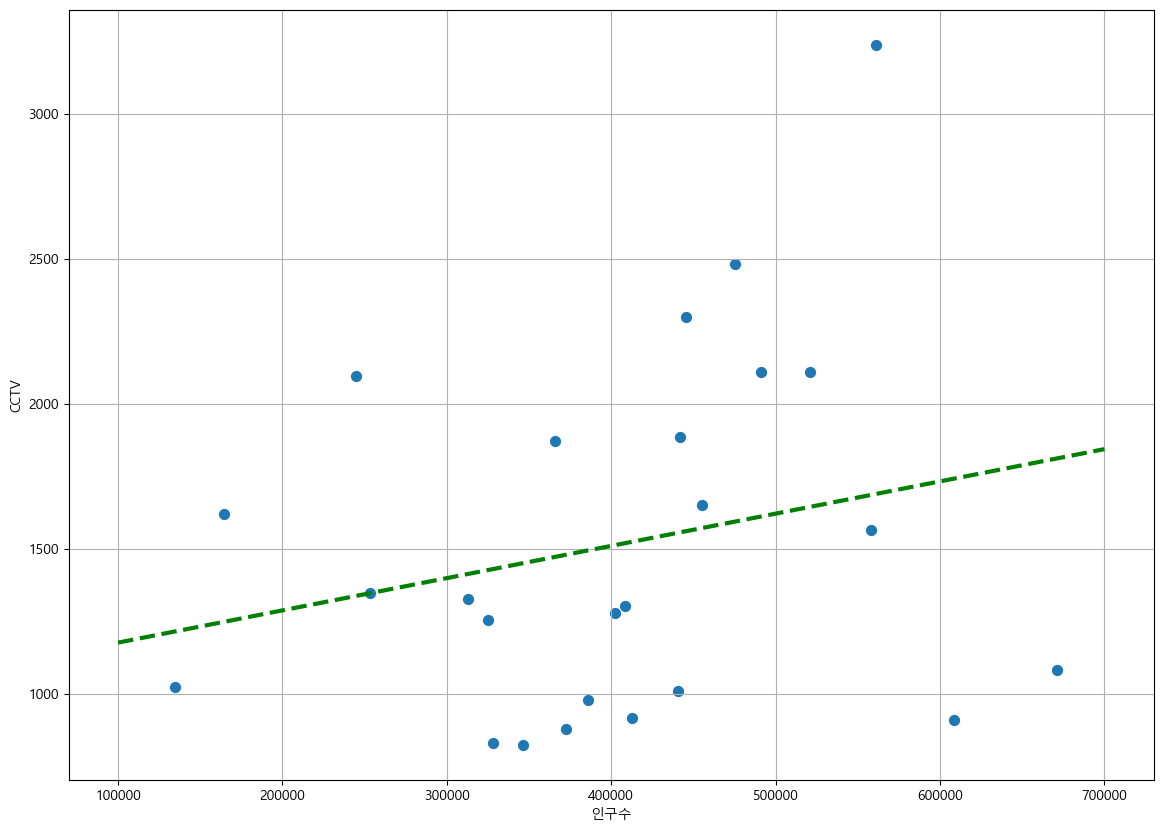

In [143]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid(True)
    plt.show()
    
drawGraph()

## 7. 강조하고 싶은 데이터를 시각화해보자

### 그래프 다듬기
#### 경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향은 f1 함수에 해당 인구를 입력
- f1(data_result['인구수'])

In [144]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [145]:
data_result['오차'] = data_result['소계'] - f1(data_result['인구수'])

In [147]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [149]:
# 경향과 비교하여 데이터 오차가 너무 나는 데이터 계산

df_sort_f = data_result.sort_values(by='오차', ascending=False) #내림차순
df_sort_t = data_result.sort_values(by='오차', ascending=True) #오름차순

In [150]:
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [151]:
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [156]:
from matplotlib.colors import ListedColormap
# colormap을 사용자 정의(user define)로 세팅
color_step = ['#e74c3c', '#2ecc71', '#95a9a6', '#2ecc71', '#3498db', '#3498db'] #구글에 코드값 검색하면 색깔별 코드값을 조회할 수 있음
my_cmap = ListedColormap(color_step)

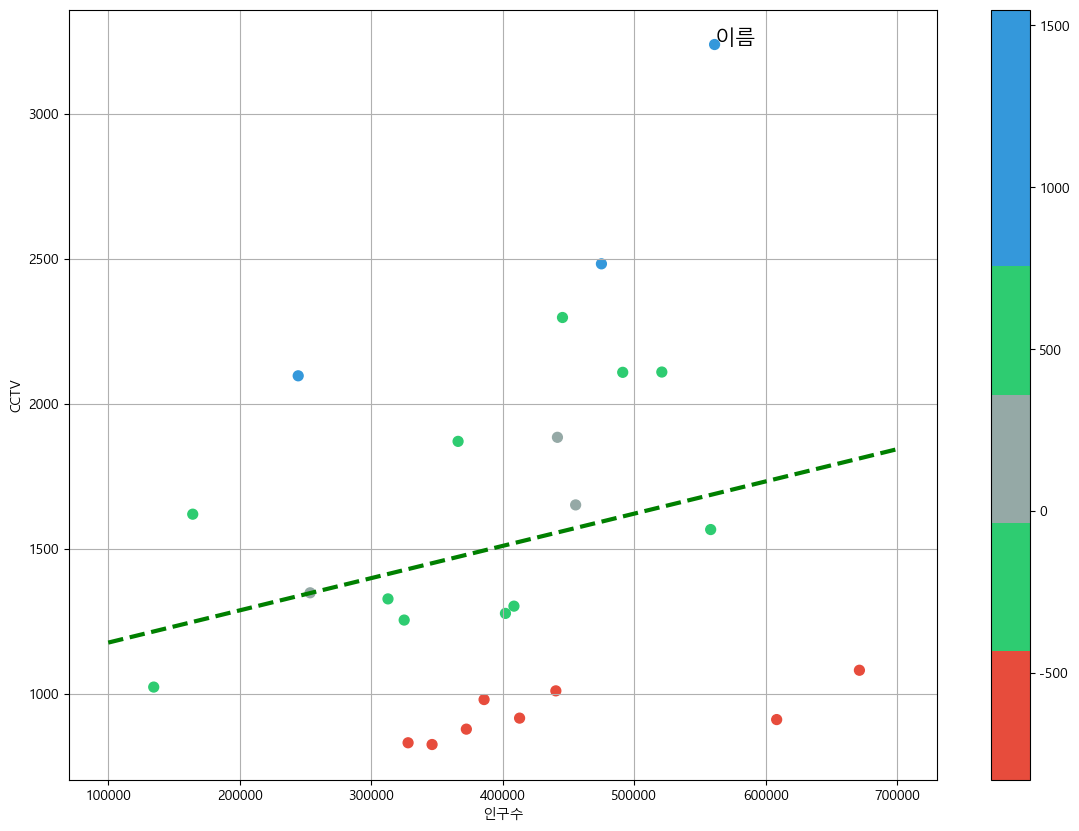

In [162]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.text(df_sort_f['인구수'][0], df_sort_f['소계'][0], '이름', fontsize=15) #x, y, text, 설정 - 텍스트가 아래 점과 너무 붙어있음
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.colorbar()
    plt.grid(True)
    plt.show()
    
drawGraph()

In [163]:
data_result['인구수'][0]

561052

In [164]:
data_result['소계'][0]

3238

In [165]:
data_result.index[0]

'강남구'

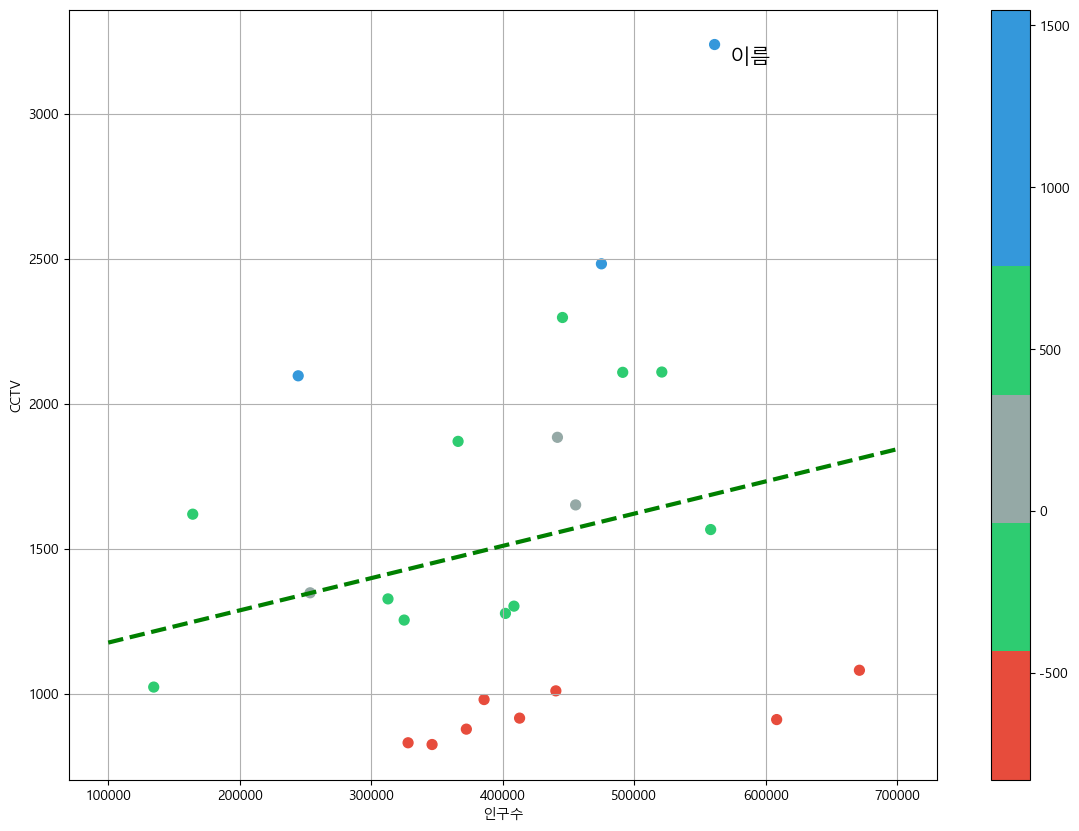

In [168]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.text(df_sort_f['인구수'][0] * 1.02, df_sort_f['소계'][0] * 0.98, '이름', fontsize=15) # x에는 *1.02 y에는 * 0.98했더니 간격^
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.colorbar()
    plt.grid(True)
    plt.show()
    
drawGraph()

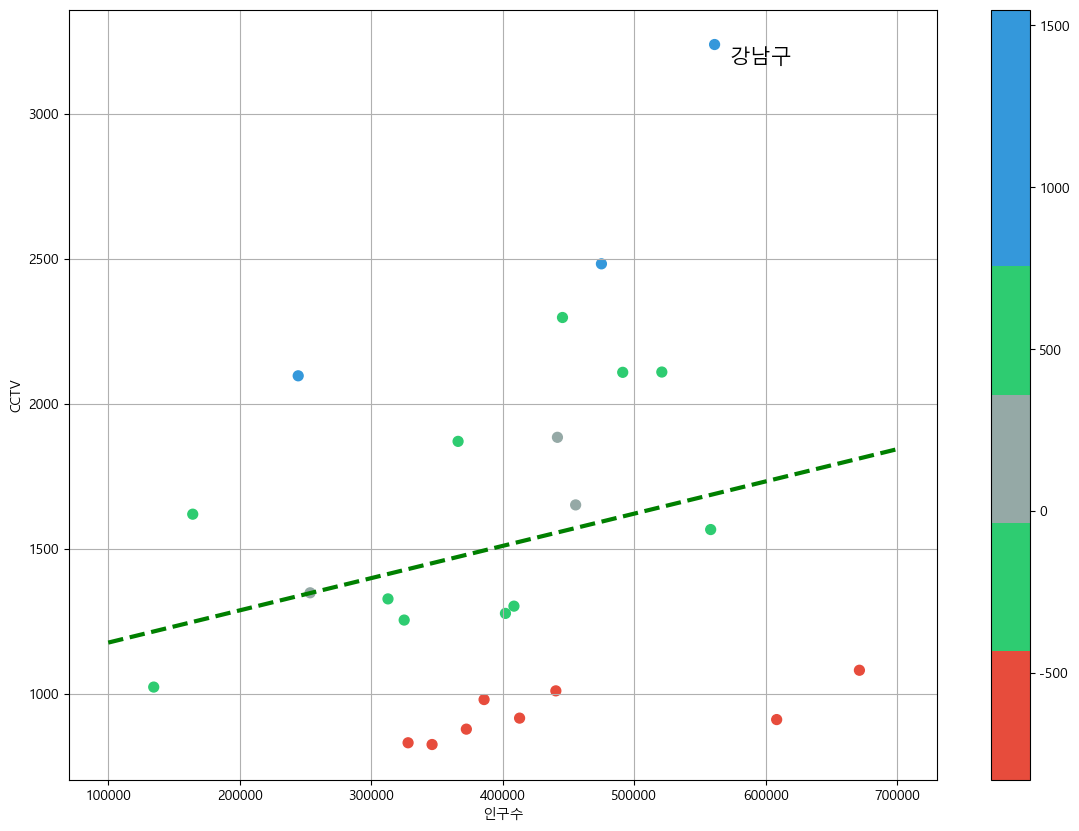

In [169]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.text(df_sort_f['인구수'][0] * 1.02, df_sort_f['소계'][0] * 0.98, df_sort_f.index[0], fontsize=15) # 다른 점들에도 적용해야함
    plt.ylabel('CCTV')
    plt.colorbar()
    plt.grid(True)
    plt.show()
    
drawGraph()

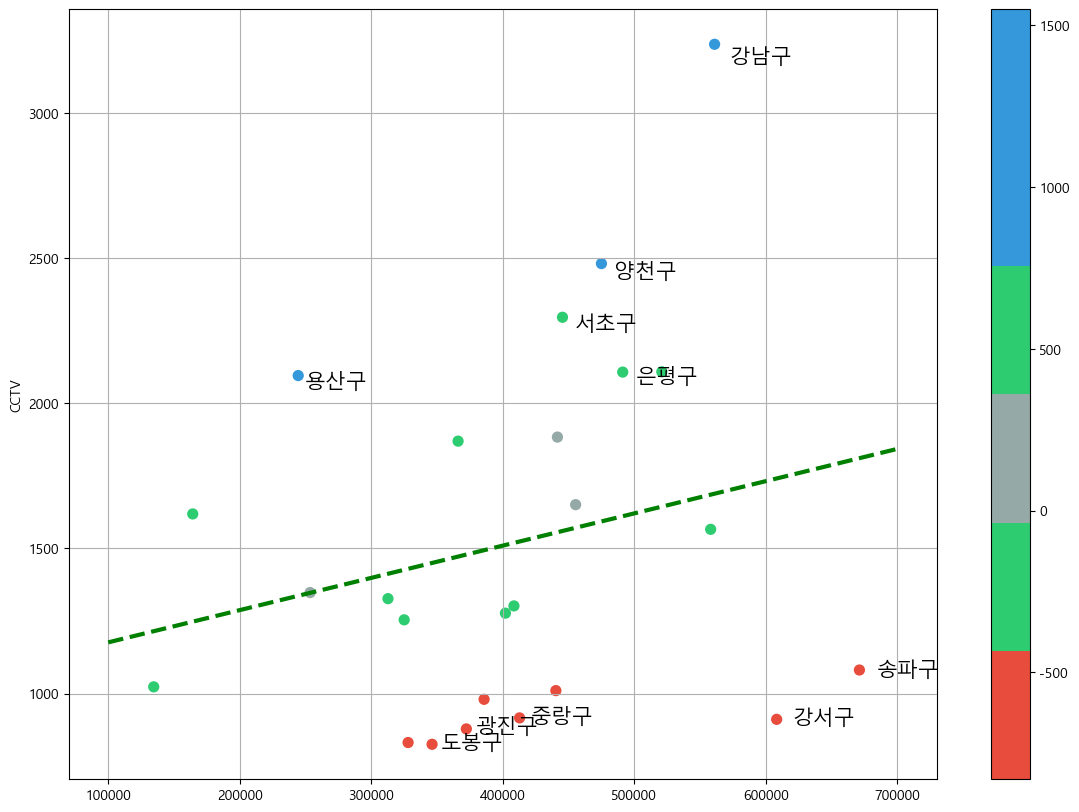

In [172]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    
    #상위 5개
    for n in range(5):
        plt.text(
            df_sort_f['인구수'][n] * 1.02,
            df_sort_f['소계'][n] * 0.98,
            df_sort_f.index[n],
            fontsize=15)
    
    #하위 5개
    for n in range(5):
        plt.text(
            df_sort_t['인구수'][n] * 1.02,
            df_sort_t['소계'][n] * 0.98,
            df_sort_t.index[n],
            fontsize=15)  
        
    plt.ylabel('CCTV')
    plt.colorbar()
    plt.grid(True)
    plt.show()
    
drawGraph()

In [175]:
data_result.to_csv('../data/01.CCTV_result.csv', sep=',', encoding='utf-8')